In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
car_data = pd.read_csv("Car_sales1.csv")

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales in thousands     157 non-null float64
4-year resale value    157 non-null object
Vehicle type           157 non-null object
Price in thousands     157 non-null object
Engine size            157 non-null object
Horsepower             157 non-null object
Wheelbase              157 non-null object
Width                  157 non-null object
Length                 157 non-null object
Curb weight            157 non-null object
Fuel capacity          157 non-null object
Fuel efficiency        157 non-null object
Latest Launch          157 non-null object
dtypes: float64(1), object(14)
memory usage: 18.5+ KB


In [4]:
car_data.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.92,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.64,13.2,28,2-Feb-14
1,Acura,TL,39.38,19.88,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.52,17.2,25,6-Mar-15
2,Acura,CL,14.11,18.23,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.59,29.73,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.40,22.26,Passenger,23.99,1.8,150,102.6,68.2,178,3,16.4,27,10-Aug-15


In [5]:
car_data.shape

(157, 15)

In [6]:
car_data.describe()

,Sales in thousands
count,157.000000
mean,52.998790
std,68.029394
min,0.110000
25%,14.110000
50%,29.450000
75%,67.960000
max,540.560000


In [7]:
drop_cols = ['Curb weight']
car_data = car_data.drop(drop_cols, axis=1)

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales in thousands     157 non-null float64
4-year resale value    157 non-null object
Vehicle type           157 non-null object
Price in thousands     157 non-null object
Engine size            157 non-null object
Horsepower             157 non-null object
Wheelbase              157 non-null object
Width                  157 non-null object
Length                 157 non-null object
Fuel capacity          157 non-null object
Fuel efficiency        157 non-null object
Latest Launch          157 non-null object
dtypes: float64(1), object(13)
memory usage: 17.2+ KB


In [9]:
car_data = car_data.drop_duplicates(keep='first')

In [10]:
car_data_sort_sales = car_data.sort_values(by='Sales in thousands' , ascending=False)
car_data_sort_sales.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Fuel capacity,Fuel efficiency,Latest Launch
56,Ford,F-Series,540.56,15.08,Car,26.94,4.6,220,138.5,79.1,224.5,25.1,18,16-Aug-14
52,Ford,Explorer,276.75,16.64,Car,31.93,4,210,111.6,70.2,190.7,21,19,25-Apr-14
137,Toyota,Camry,247.99,13.25,Passenger,17.52,2.2,133,105.2,70.1,188.5,18.5,27,2-Oct-15
49,Ford,Taurus,245.82,10.06,Passenger,17.89,3,155,108.5,73,197.6,16,24,20-Dec-15
58,Honda,Accord,230.90,13.21,Passenger,15.35,2.3,135,106.9,70.3,188.8,17.1,27,20-May-14


In [11]:
car_data_sort_fuel = car_data.sort_values(by='Fuel efficiency', ascending=False)
car_data_sort_fuel.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Fuel capacity,Fuel efficiency,Latest Launch
26,Chevrolet,Metro,21.86,5.16,Passenger,9.24,1,55,93.1,62.6,149.4,10.3,45,13-Apr-14
25,Chevrolet,Prizm,32.30,9.13,Passenger,13.96,1.8,120,97.1,66.7,174.3,13.2,33,9-Nov-15
136,Toyota,Corolla,142.54,10.03,Passenger,13.11,1.8,120,97,66.7,174,13.2,33,4-Nov-15
130,Saturn,SC,24.55,10.59,Passenger,12.54,1.9,100,102.4,66.4,180,12.1,33,16-Mar-15
129,Saturn,SL,80.62,9.2,Passenger,10.69,1.9,100,102.4,66.4,176.9,12.1,33,16-Aug-14


In [12]:
def maximum_minimum_values(column):
    top = car_data[column].idxmax()
    top_obs = pd.DataFrame(car_data.loc[top])
    
    bottom = car_data[column].idxmin()
    bottom_obs = pd.DataFrame(car_data.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bottom_obs], axis=1)
    
    return min_max_obs

In [13]:
maximum_minimum_values('Sales in thousands')

,56,83
Manufacturer,Ford,Mitsubishi
Model,F-Series,3000GT
Sales in thousands,540.56,0.11
4-year resale value,15.08,20.94
Vehicle type,Car,Passenger
Price in thousands,26.94,25.45
Engine size,4.6,3
Horsepower,220,161
Wheelbase,138.5,97.2
Width,79.1,72.4


(array([31., 30., 23., 16.,  8.,  6.,  8., 10.,  4.,  2.,  2.,  1.,  2.,
         2.,  2.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  2.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.10000e-01, 1.09190e+01, 2.17280e+01, 3.25370e+01, 4.33460e+01,
        5.41550e+01, 6.49640e+01, 7.57730e+01, 8.65820e+01, 9.73910e+01,
        1.08200e+02, 1.19009e+02, 1.29818e+02, 1.40627e+02, 1.51436e+02,
        1.62245e+02, 1.73054e+02, 1.83863e+02, 1.94672e+02, 2.05481e+02,
        2.16290e+02, 2.27099e+02, 2.37908e+02, 2.48717e+02, 2.59526e+02,
        2.70335e+02, 2.81144e+02, 2.91953e+02, 3.02762e+02, 3.13571e+02,
        3.24380e+02, 3.35189e+02, 3.45998e+02, 3.56807e+02, 3.67616e+02,
        3.78425e+02, 3.89234e+02, 4.00043e+02, 4.10852e+02, 4.21661e+02,
        4.32470e+02, 4.43279e+02, 4.54088e+02, 4.64897e+02, 4.75706e+02,
        4.86515e+02, 4.97324e+02, 5.08133e+02, 5.18942e+02,

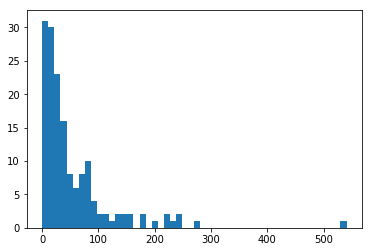

In [14]:
num_bins = 50
plt.hist(car_data['Sales in thousands'], num_bins)

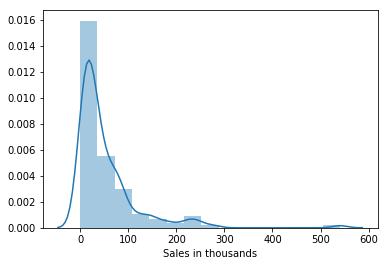

In [15]:
sns.distplot(car_data['Sales in thousands'], 15)

In [16]:
make_dist = car_data.groupby('Manufacturer').size()

In [17]:
make_dist

Manufacturer
Acura             4
Audi              3
BMW               3
Buick             4
Cadillac          5
Chevrolet         9
Chrysler          7
Dodge            11
Ford             11
Honda             5
Hyundai           3
Infiniti          1
Jaguar            1
Jeep              3
Lexus             6
Lincoln           3
Mercedes-Benz     9
Mercury           6
Mitsubishi        7
Nissan            7
Oldsmobile        6
Plymouth          4
Pontiac           6
Porsche           3
Saab              2
Saturn            5
Subaru            2
Toyota            9
Volkswagen        6
Volvo             6
dtype: int64

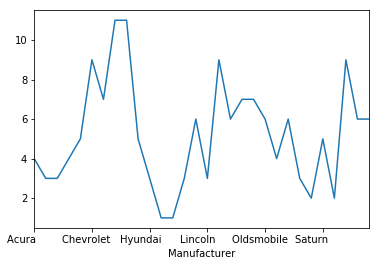

In [18]:
make_dist.plot()

In [19]:
car_numeric = car_data.select_dtypes(include=['float64','int64'])
car_numeric.head()

,Sales in thousands
0,16.92
1,39.38
2,14.11
3,8.59
4,20.40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002408FF8ECF8>]],
      dtype=object)

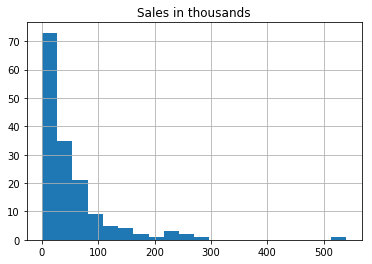

In [20]:
car_numeric.hist(bins=20)

In [22]:
for i in range(0, car_numeric.columns, 5):
    sns.pairplot(car_numeric, x_vars=['Sales in thousands'], y_vars=car_numeric.columns[i:i+5])

TypeError: 'Index' object cannot be interpreted as an integer

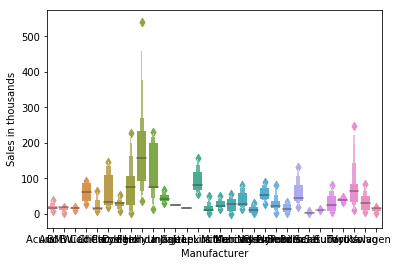

In [24]:
sns.boxenplot(x="Manufacturer", y='Sales in thousands', data=car_data)

In [25]:
ss = pd.to_numeric(car_data['Fuel efficiency'], errors='coerce')

In [26]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 14 columns):
Manufacturer           157 non-null object
Model                  157 non-null object
Sales in thousands     157 non-null float64
4-year resale value    157 non-null object
Vehicle type           157 non-null object
Price in thousands     157 non-null object
Engine size            157 non-null object
Horsepower             157 non-null object
Wheelbase              157 non-null object
Width                  157 non-null object
Length                 157 non-null object
Fuel capacity          157 non-null object
Fuel efficiency        157 non-null object
Latest Launch          157 non-null object
dtypes: float64(1), object(13)
memory usage: 23.4+ KB


In [29]:
sns.regplot(car_data['Sales in thousands'], 'ss')

ValueError: Must pass `data` if using named variables.